Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [10]:

library('tidymodels')
library('ggplot2')


The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [3]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [5]:

glimpse(diabetes_train) 


Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 5, 10, 4, 10, 1, 3, 8, 1, 5, 3, 10, 11,…
$ Glucose                  <dbl> 85, 89, 116, 115, 110, 139, 103, 126, 99, 97,…
$ BloodPressure            <dbl> 66, 66, 74, 0, 92, 80, 30, 88, 84, 66, 75, 58…
$ SkinThickness            <dbl> 29, 23, 0, 0, 0, 0, 38, 41, 0, 15, 26, 11, 31…
$ Insulin                  <dbl> 0, 94, 0, 0, 0, 0, 83, 235, 0, 140, 0, 54, 0,…
$ BMI                      <dbl> 26.6, 28.1, 25.6, 35.3, 37.6, 27.1, 43.3, 39.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.201, 0.134, 0.191, 1.441, 0.1…
$ Age                      <dbl> 31, 21, 30, 29, 30, 57, 33, 27, 50, 22, 60, 2…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

The variable most suitable as the outcome seems to be the "Outcome" variable, which is either 1 or 0(diabetic or non-diabetic)

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test            |
| BMI         | Body mass index (weight in kg/(height in m)^2)            |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

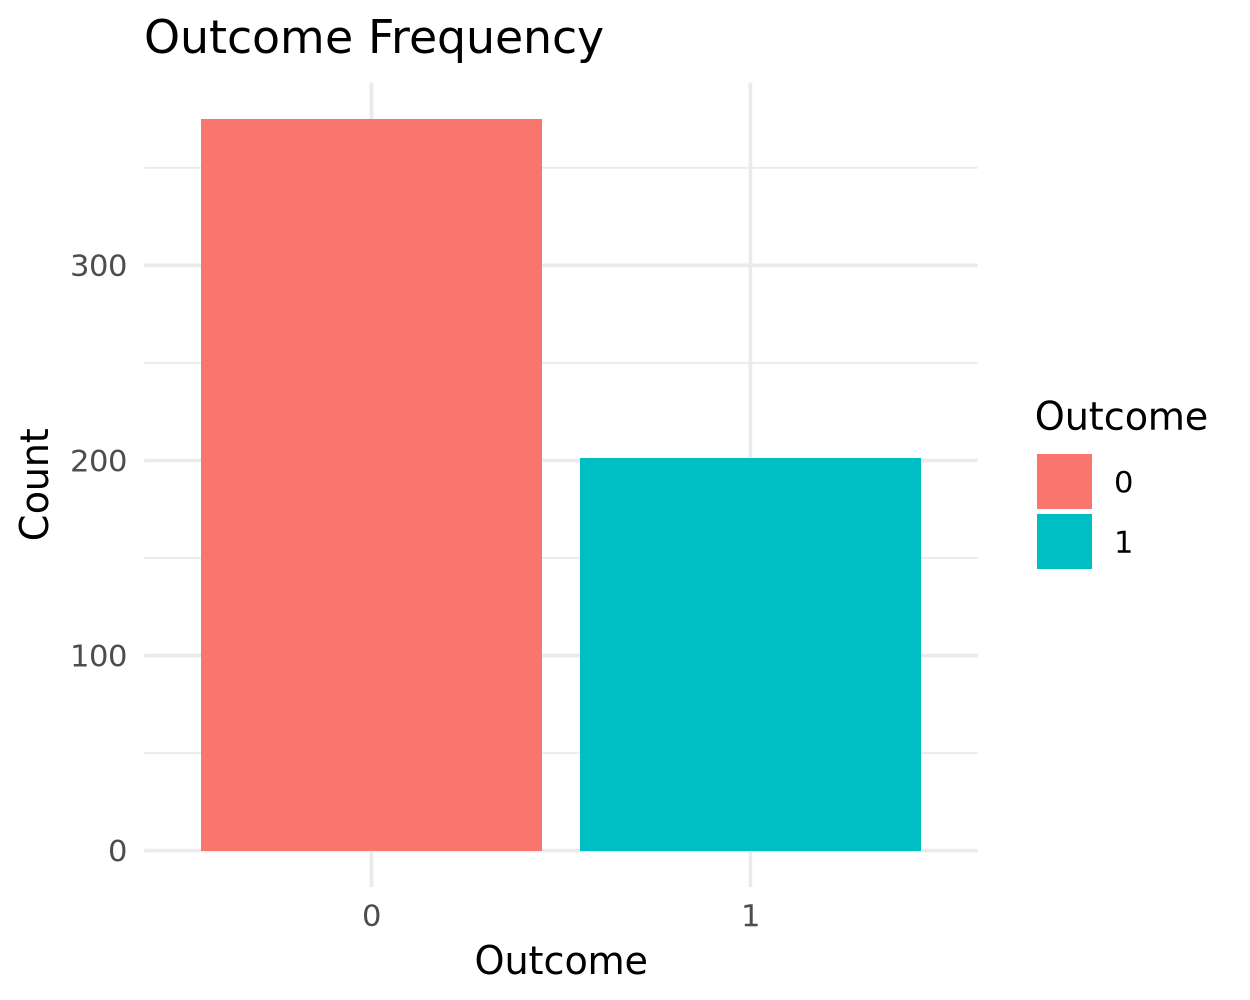

In [35]:
ggplot(diabetes_train, aes(x = factor(Outcome), fill=Outcome)) +
  geom_bar() +
  labs(
    title = "Outcome Frequency",
    x = "Outcome",
    y = "Count") +
  theme_minimal()


❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**


No, the data is not balanced. Equal counts of each outcome is nto required for classification. 


Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [23]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

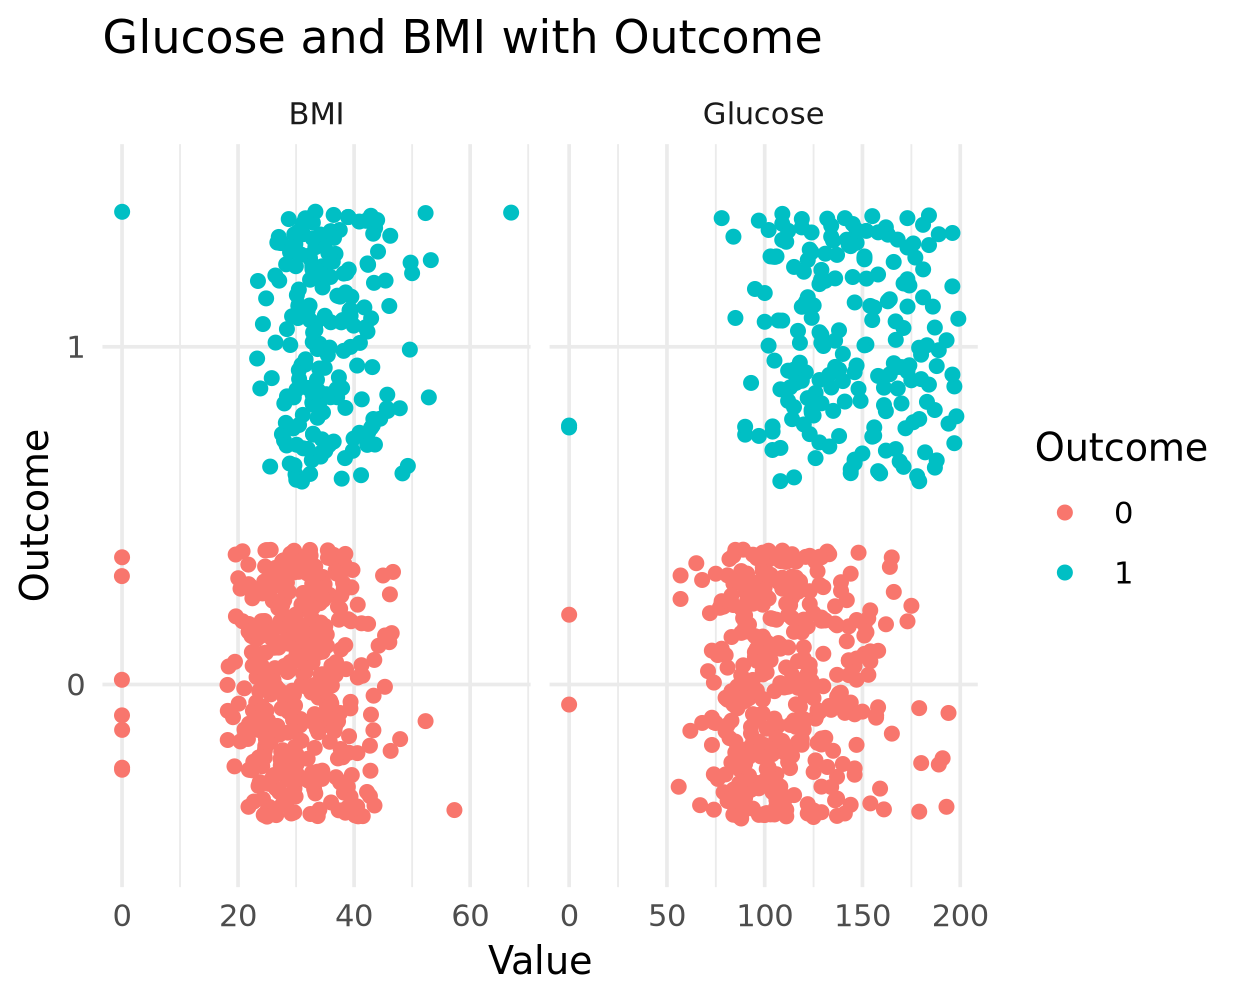

In [34]:
ggplot(plot_df, aes(x = value, y = Outcome, color = Outcome)) +
  geom_jitter() +
  facet_wrap(~name, ncol = 2, scales = "free_x") +
  labs(title = "Glucose and BMI with Outcome",
       x = "Value",
       y = "Outcome") + theme_minimal()


❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

Without `scales = 'free_x'` the x-value scales for each feature are the same, changing the visual distribution of the points. 

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [46]:

rec = recipe(Outcome ~ BMI + Glucose, data = diabetes_train)

rec_prepped = prep(rec, training = diabetes_train)

mod = logistic_reg() |> set_engine('glm')
mod_fit = mod |> fit(Outcome ~ BMI + Glucose, juice(rec_prepped))
tidy(mod_fit)



term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-7.69908169,0.71231546,-10.808528,3.136623e-27
BMI,0.08317460,0.01591809,5.225161,1.740039e-07
Glucose,0.03440956,0.00373068,9.223401,2.878224e-20


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [57]:


diabetes_test_with_pred = augment(mod_fit, new_data = diabetes_test)

head(diabetes_test_with_pred)
diabetes_test_with_pred


.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.4530886,0.54691145,6,148,72,35,0,33.6,0.627,50,1
0,0.9676384,0.03236156,8,125,96,0,0,0.0,0.232,54,1
1,0.2240257,0.77597431,10,168,74,0,0,38.0,0.537,34,1
0,0.8535710,0.14642901,7,100,0,0,0,30.0,0.484,32,1
1,0.4339691,0.56603090,11,143,94,33,146,36.6,0.254,51,1
0,0.7033329,0.29666707,13,145,82,19,110,22.2,0.245,57,0


.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.4530886,0.54691145,6,148,72,35,0,33.6,0.627,50,1
0,0.9676384,0.03236156,8,125,96,0,0,0.0,0.232,54,1
1,0.2240257,0.77597431,10,168,74,0,0,38.0,0.537,34,1
0,0.8535710,0.14642901,7,100,0,0,0,30.0,0.484,32,1
1,0.4339691,0.56603090,11,143,94,33,146,36.6,0.254,51,1
0,0.7033329,0.29666707,13,145,82,19,110,22.2,0.245,57,0
0,0.6978139,0.30218605,5,117,92,0,0,34.1,0.337,38,0
1,0.4095211,0.59047895,3,158,76,36,245,31.6,0.851,28,1
0,0.9467596,0.05324039,6,92,92,0,0,19.9,0.188,28,0


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [56]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 112  37
         1  13  30

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

1. 67
2. 30
3. 13